In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

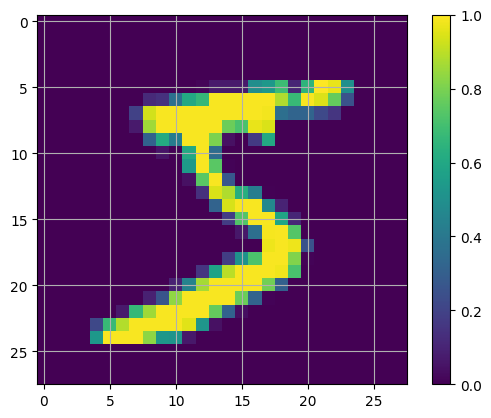

In [13]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Epoch 1/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1449 - accuracy: 0.9590 - val_loss: 0.0450 - val_accuracy: 0.9872
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0818 - accuracy: 0.9761 - val_loss: 0.0319 - val_accuracy: 0.9915
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0629 - accuracy: 0.9829 - val_loss: 0.0354 - val_accuracy: 0.9907
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0478 - accuracy: 0.9865 - val_loss: 0.0319 - val_accuracy: 0.9907
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0408 - accuracy: 0.9879 - val_loss: 0.0310 - val_accuracy: 0.9917
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0348 - accuracy: 0.9901 - val_loss: 0.0287 - val_accuracy: 0.9915
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0294 - accuracy: 0.9914 - val_loss: 0.0442 - val_accuracy:

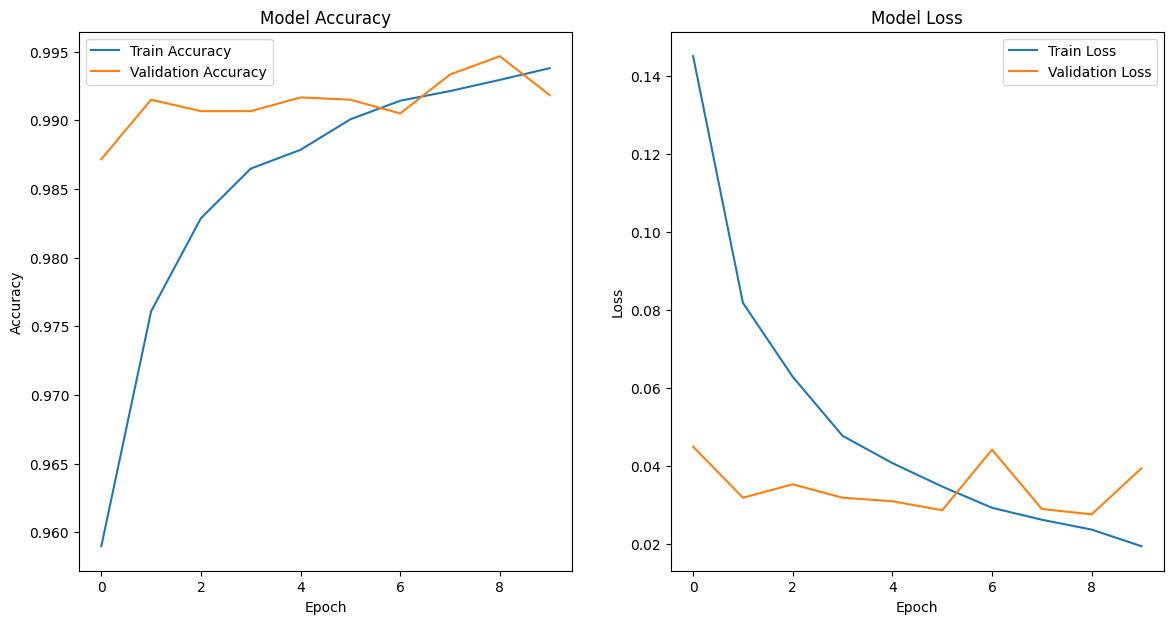

In [17]:
weights_history = []
def collect_weights(epoch, logs):
    weights = model.layers[0].get_weights()[0]
    weights_history.append(weights)

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
weight_visualizer = LambdaCallback(on_epoch_end=collect_weights)

history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_split=0.1, callbacks=[early_stopping, weight_visualizer])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc}\n")

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


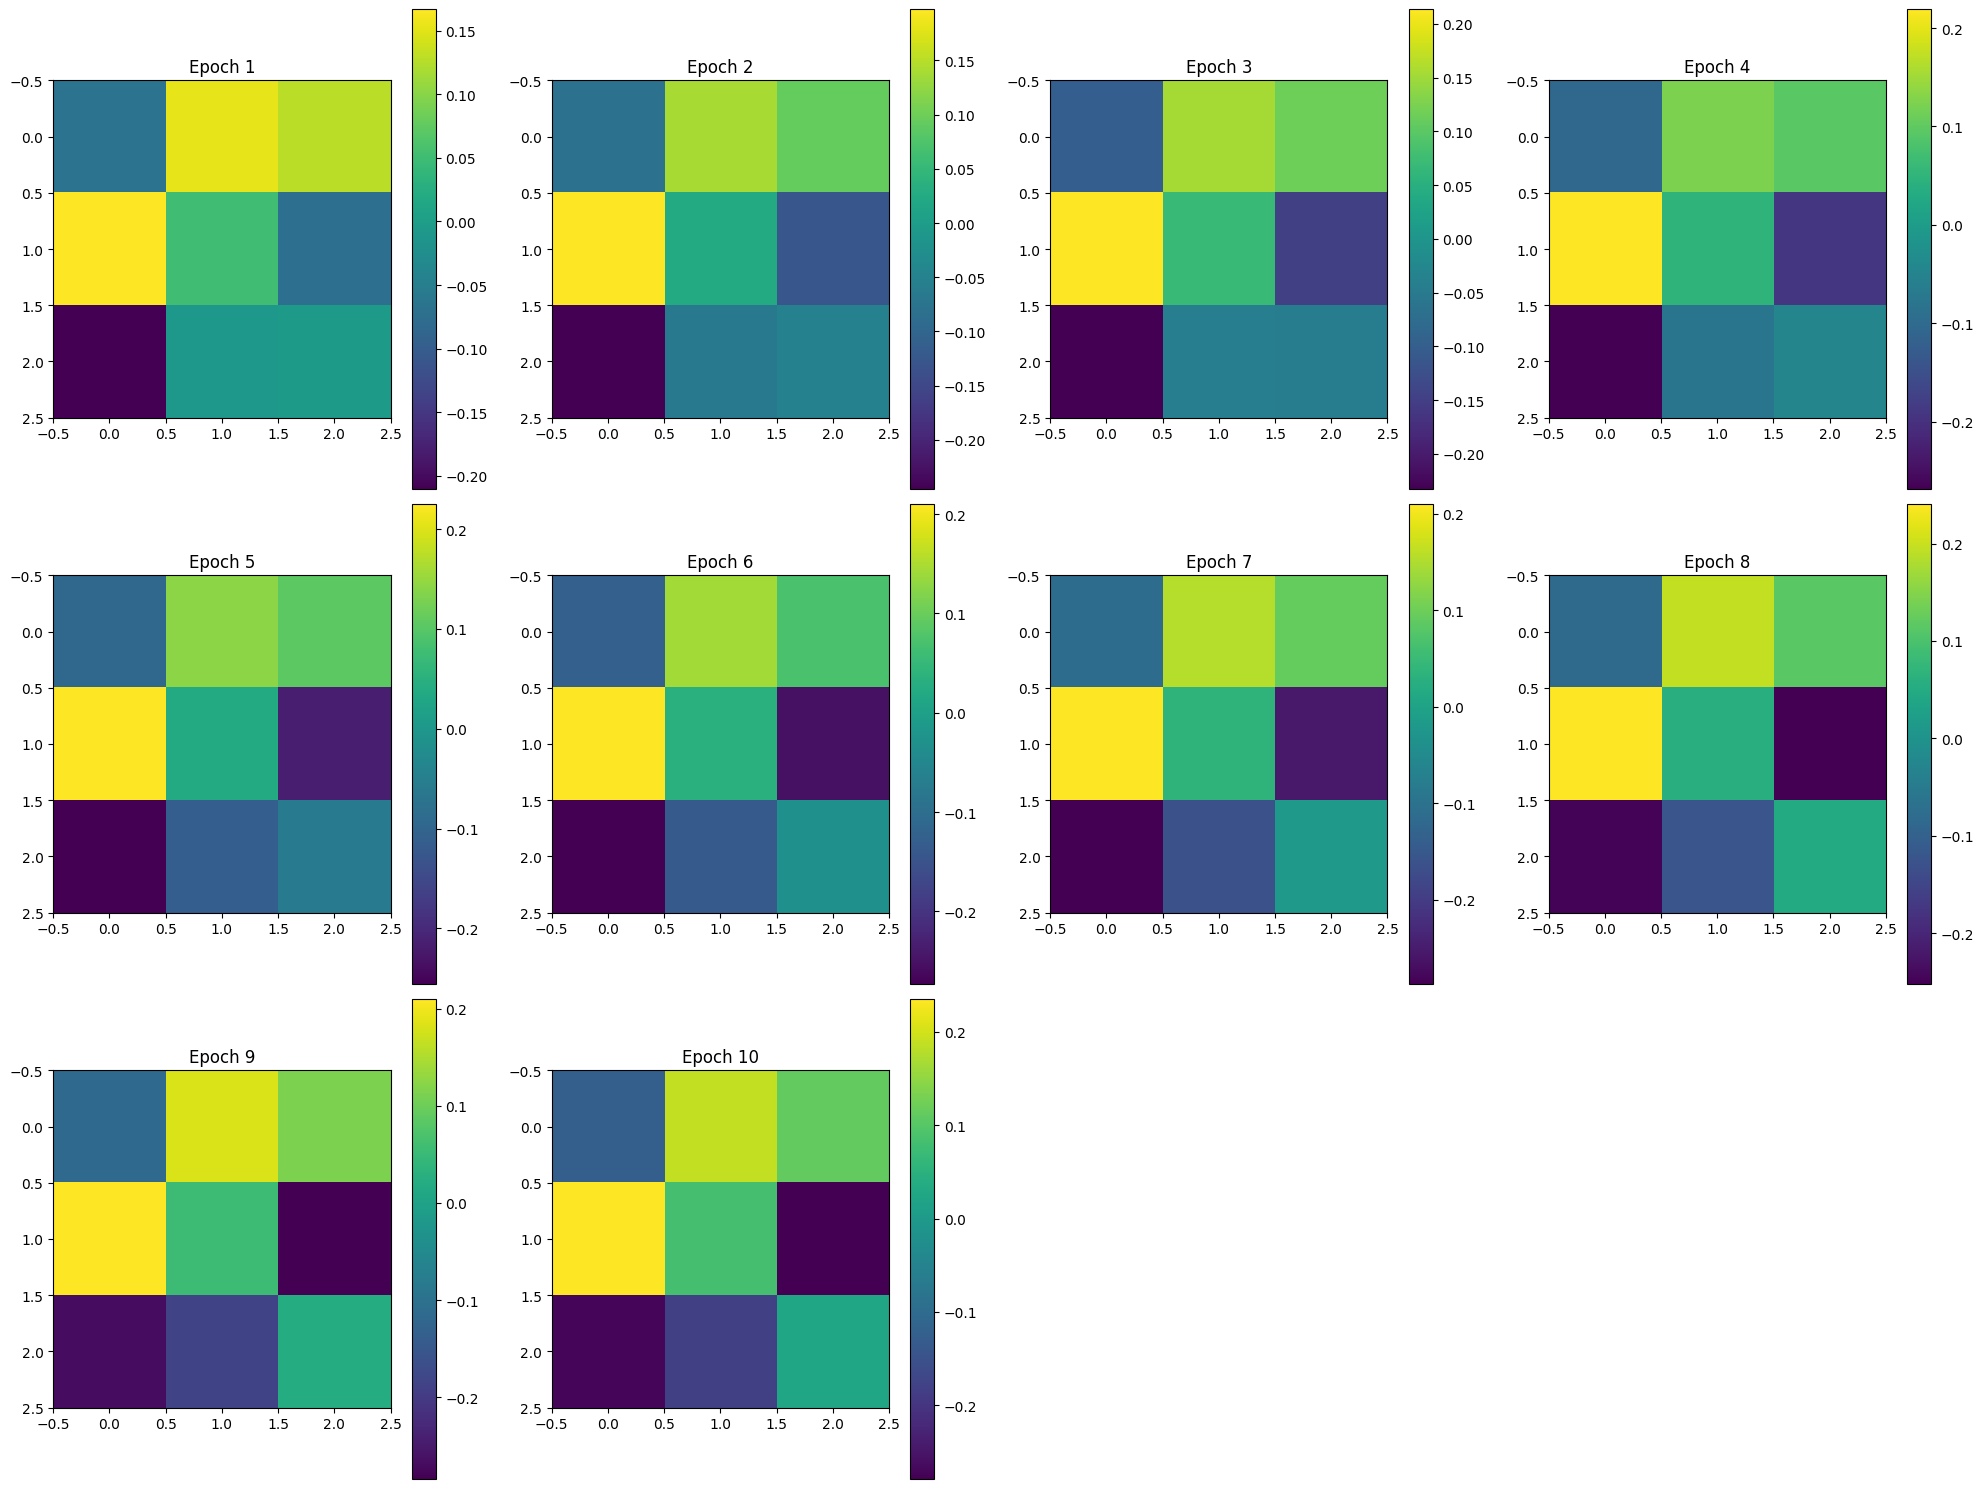

In [46]:
num_epochs = len(weights_history)
num_columns = int(np.ceil(np.sqrt(num_epochs)))
num_rows = int(np.ceil(num_epochs / num_columns))

plt.figure(figsize=(num_columns * 5, num_rows * 5))

for epoch, weights in enumerate(weights_history, 1):
    ax = plt.subplot(num_rows, num_columns, epoch)
    ax.imshow(weights[:, :, 0, 0], cmap='viridis')
    ax.title.set_text(f'Epoch {epoch}')
    plt.colorbar(ax.imshow(weights[:, :, 0, 0], cmap='viridis'), ax=ax)

plt.tight_layout()
plt.show()


313/313 [==============================] - 1s 2ms/step


<Axes: >

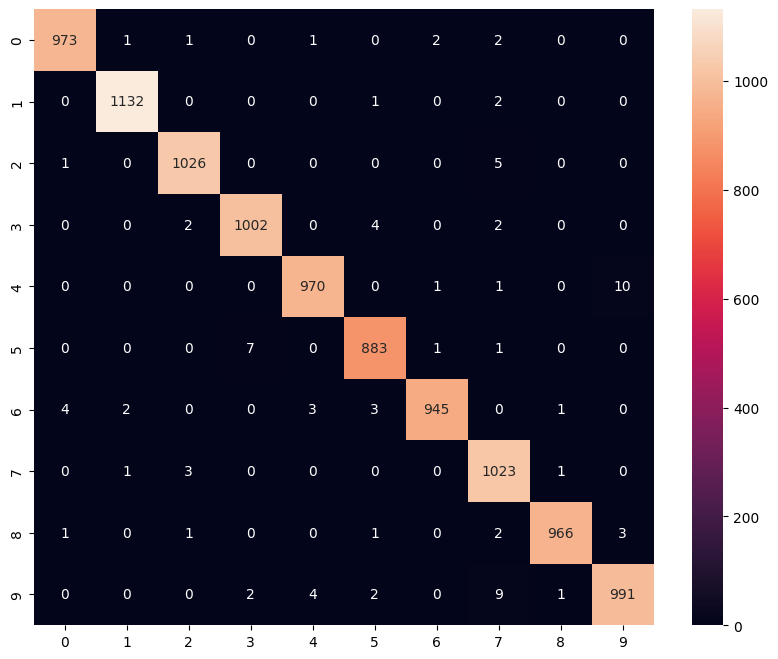

In [23]:
import seaborn as sns
Y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

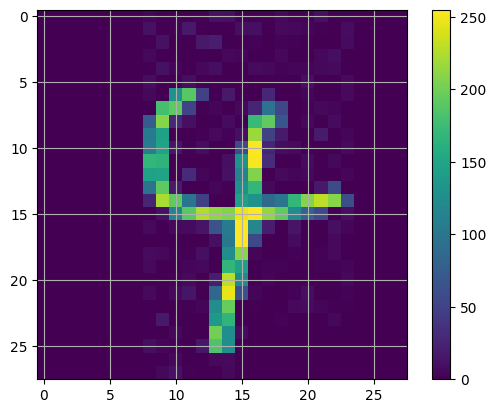


Predicted Value: 4


In [40]:
def predict_digit(img_path):
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0) / 255
    prediction = model.predict(img_tensor,verbose=0)
    plt.imshow(img)
    plt.colorbar()
    plt.grid(True)
    plt.show()
    print("\nPredicted Value:",np.argmax(prediction))
predict_digit("./mnist.jpg")